# 95-865 Fall 2019 Quiz 1 (Solutions)

**Your name:**

**Your Andrew ID:**

**Your section (A2/B2/K2):**

Before starting the quiz, please run this next cell first. **Important:** The exam is written so that all the packages that need to be imported are already imported in the next cell.

In [1]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
import re
import string
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
plt.style.use('seaborn')

## Problem 1 [45 points total]

This problem tests concepts from basic text processing including frequency and co-occurrence analysis. Consider the following Python string that we shall analyze (be sure to run the next cell):

In [2]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
text = 'm m h f d h l j j g f h i l o t p q s u x t t x x s w v t o m m h e d i e d d d h c b b b a c e h f c h e a a e f f g j i e e j o t w s o q u y w x z x y v q o o s x w v w v u s r q t s q v x z z z z u q q u s n n i e c e c a f d c c f a f j e c d h e j g e d c g e e b c d b e g j g e a a a d d i l o l j g b a a d i n k n m k f e d g k n i l l p k o p p n j m h g k l l n q t x u x y w x z z v r s v y w t r w x v w w y w r u t y z x x x w z w u y y w v v t r t x t x z x y v s q u z x x z z z v s p s o o r q l i i i d i e b a d i l k j e j h j h e b b c b f e c f f f c h h j l m i j l i g c b f f j n k f j f j o j k f k j m l j h k n p k i l n p u q t s u p o s n s t s p o p n s q s v v q t t s u z w v r p n r o o l j j o q n p l m r r m h m k p l q u y z u x z u x y t x s q r n p o s p k n k m p o n j l m q p l l p r n l l n l m n p t p t u p n q p l k k f d b e e e a a c f i h i m k i f b c c b d d e b b a a c e d f g e c b a e b e e a a f d f f b f i j i k i i g h g i g b f j h j j j'

Here, we tokenize by splitting on spaces, so the vocabulary just consists of each letter of the English alphabet. There is no lemmatization. You can assume all letters are lowercase. Do not use stop words. Write your code using only basic Python, matplotlib, and, if you would like, NumPy. Do not use Pandas or any other external libraries.

**(a) [5 points]** Plot a histogram showing how often each term (i.e., English letter) appears, where the x-axis has the letters sorted in alphabetical order, and the y-axis **has frequencies as fractions and not raw counts** (so if we add up the frequencies for all the letters, we get 1).

Text(0, 0.5, 'Frequency')

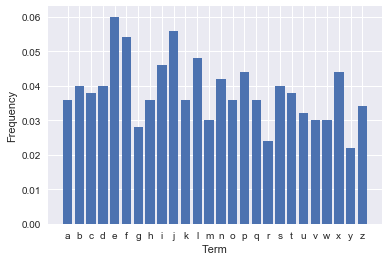

In [3]:
# ------------------------------------------------------------------------------
# YOUR CODE GOES HERE
#

histogram = Counter()
for term in text.split():
    histogram[term] += 1

terms_sorted = sorted(histogram.keys())
raw_counts = [histogram[term] for term in terms_sorted]
raw_counts = np.array(raw_counts)
frequencies = raw_counts / raw_counts.sum()

plt.bar(range(len(terms_sorted)), frequencies)
plt.xticks(range(len(terms_sorted)), terms_sorted)
plt.xlabel('Term')
plt.ylabel('Frequency')

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

**(b) [15 points]** Compute the co-occurrence table between different terms in the following manner: 

1. Initialize the co-occurrence between every pair of English alphabet letters to be 0.
2. Look at every consecutive pair of terms in the text (so the first pair is `'m'` & `'m'`, the second is `'m'` & `'h'`, etc); for each pair we encounter, add 1 to the number of times we see that pair appear (disregarding order, so `m` & `h` co-occurring is the same as `h` and `m` co-occurring). _In particular, this means that we are only counting co-occurrences for terms that appear right next to each other in the text._

After computing the table, please display it as a heat map (using matplotlib's `imshow`), where rows and columns correspond to English alphabet letters sorted alphabetically.

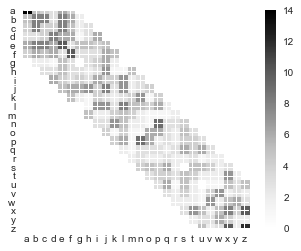

In [4]:
# ------------------------------------------------------------------------------
# YOUR CODE GOES HERE
#

split_text = text.split()
co_occurrences = Counter()
for idx in range(len(split_text) - 1):
    term1 = split_text[idx]
    term2 = split_text[idx + 1]
    co_occurrences[(term1, term2)] += 1
    co_occurrences[(term2, term1)] += 1

co_occurrence_table = np.zeros((len(terms_sorted), len(terms_sorted)))
for idx1, term1 in enumerate(terms_sorted):
    for idx2, term2 in enumerate(terms_sorted):
        co_occurrence_table[idx1, idx2] = co_occurrences[(term1, term2)]
        
plt.imshow(co_occurrence_table)
plt.xticks(range(26), 'abcdefghijklmnopqrstuvwxyz')
plt.yticks(range(26), 'abcdefghijklmnopqrstuvwxyz')
plt.colorbar()

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

**(c) [15 points]** Compute what the co-occurrence table would look like if adjacent terms were independent. To do this, make use of the marginal probabilities for terms that you determined in part (a).

After computing the table, please display it as a heat map (using matplotlib's `imshow`), where rows and columns correspond to English alphabet letters sorted alphabetically.

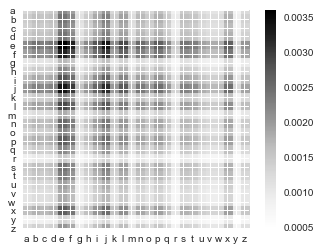

In [5]:
# ------------------------------------------------------------------------------
# YOUR CODE GOES HERE
#

co_occurrence_table_under_independence_assumption = np.zeros((len(terms_sorted), len(terms_sorted)))
for idx1, term1 in enumerate(terms_sorted):
    for idx2, term2 in enumerate(terms_sorted):
        co_occurrence_table_under_independence_assumption[idx1, idx2] = frequencies[idx1] * frequencies[idx2]

plt.imshow(co_occurrence_table_under_independence_assumption)
plt.xticks(range(26), 'abcdefghijklmnopqrstuvwxyz')
plt.yticks(range(26), 'abcdefghijklmnopqrstuvwxyz')
plt.colorbar()

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

**(d)** Only answer this part if you've already completed parts (b) and (c).

**Subpart i. [5 points]** What is the PMI for `'a'` and `'z'`? Be sure to briefly explain your answer. (Note: As with the previous two parts, we are considering terms that are adjacent to each other in the text when computing raw co-occurrences.)

**Your answer here (do not write code in your answer):** -infinity; the co-occurrence is 0 so the PMI value regardless of the base of the logarithm is -infinity.

**Subpart ii. [5 points]** Is it true that each alphabet letter in this sequence only co-occurs with another letter that is sufficiently close in terms of alphabetical ordering? If so, how close? Be sure to briefly explain your answer.

**Your answer here (do not write code in your answer):** Yes, only letters within 5 alphabet letters co-occur (e.g., 'a' co-occurs with letters up to the 5-th alphabet letter 'e' but does not co-occur with any other letters, etc).

## Problem 2 [55 points]

In this problem, we explore some Yelp review data. We are interested in understanding what might explain the rating (out of 5 stars) of a review based on the review's text.

Let's first load in the data in by running the cell below.

In [6]:
num_header_rows = 1
reviews = []  # raw text reviews
ratings = []  # these are number of stars from 1 to 5 (always an integer)
with open('yelp_review_10k_text_and_star.csv', 'r') as f:
    for row in csv.reader(f):
        if num_header_rows > 0:
            num_header_rows -= 1
            continue
        else:
            reviews.append(row[1])
            ratings.append(int(row[0]))
ratings = np.array(ratings)

num_reviews = len(reviews)

**(a)** A simple question one might ask is: _how does review length relate to the rating?_ Let's try to answer this question by looking at the data.

**Subpart i. [4 points]** For each of the ratings (1, 2, 3, 4, and 5), print out the average review length (length of string, i.e., number of characters in the string) and the standard deviation. Your output (from the `print` function) should be formatted like this:

Rating: 1, average review length: *answer*, std dev: *answer*<br>
Rating: 2, average review length: *answer*, std dev: *answer*<br>
Rating: 3, average review length: *answer*, std dev: *answer*<br>
Rating: 4, average review length: *answer*, std dev: *answer*<br>
Rating: 5, average review length: *answer*, std dev: *answer*

In [7]:
# ------------------------------------------------------------------------------
# YOUR CODE GOES HERE
#

average_review_lengths = []  # this is actually meant for subpart ii

for rating in range(1, 6):
    subset_of_reviews = [len(review) for review, r in zip(reviews, ratings) if r == rating]
    subset_of_reviews = np.array(subset_of_reviews)
    print('Rating:', rating, 'average review length', subset_of_reviews.mean(),
          'std dev:', subset_of_reviews.std())
    
    average_review_lengths.append(subset_of_reviews.mean())  # for subpart ii

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

Rating: 1 average review length 798.1020999275887 std dev: 741.7250264886297
Rating: 2 average review length 741.4318455971049 std dev: 629.2430106602283
Rating: 3 average review length 704.6416739319965 std dev: 589.8734039761274
Rating: 4 average review length 636.261935483871 std dev: 570.9689314114333
Rating: 5 average review length 498.14103751736917 std dev: 467.22470676477434


**Subpart ii. [4 points]** Building off your solution to subpart i, plot a line chart that shows average review length (along the y-axis) vs the number of stars (along the x-axis).

Text(0, 0.5, 'Average review length')

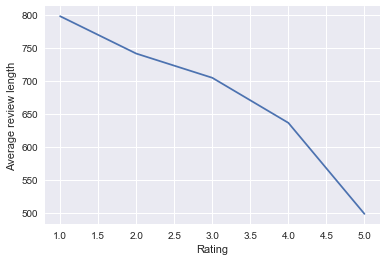

In [8]:
# ------------------------------------------------------------------------------
# YOUR CODE GOES HERE
#

plt.plot(range(1, 6), average_review_lengths)
plt.xlabel('Rating')
plt.ylabel('Average review length')

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

**Subpart iii. [2 points]** Based on your answer to the previous subparts, what general trend do you observe regarding the average review length vs the number of stars?

**Your answer here (do not write code in your answer):** There is a negative correlation; higher ratings tend to correspond to (on average) shorter reviews.

**(b)** Using only the length of reviews does not actually use any semantic information from the text. Let's now try to take advantage of text.

**Subpart i. [5 points]** We have provided a preprocessing function below. Apply this function to each review to obtain a list of preprocessed reviews (without modifying the original `reviews` variable). After computing this list, print out the 0-th preprocessed review.

In [9]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
def preprocess_review(review):
    output = review
    for c in string.punctuation:
        output = output.replace(c, '')
    output = re.sub(r'\S*\d\S*', '', output)
    output = re.sub(r'[^\w\s]', '', output)
    output = output.lower()
    output = ' '.join([piece.strip() for piece in output.split()])
    return output

In [10]:
# ------------------------------------------------------------------------------
# YOUR CODE GOES HERE
#

processed_reviews = [preprocess_review(review) for review in reviews]

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

print(processed_reviews[0])

went to sushi for the first time yesterday and was very amazed i love the happy hour i believe the best thing on there is the garlic chicken and the poke yum the staff is very friendly feels like im back home in hawaii just writing this review makes me wanna go back for the happy hour i highly recommend this place


**Subpart ii. [5 points]** Use `TfidfVectorizer` (note that this has already been imported for you; don't import it again) to transform the data into TF-IDF-weighted word counts; for `TfidfVectorizer`, use the parameters `stop_words="english"`, `min_df=500`, and `max_df=0.8` (do not specify any other parameters). *We will apply PCA to these TF-IDF-weighted word counts.*

After computing the TF-IDF-weighted word counts per review, plot what fraction of the total variance is explained by PCA when projecting the TF-IDF-weighted vectors to 10, 20, 30, 40, 50, 60, 70, 80, 90, and 100 dimensions (along the y-axis should be variance explained, and along the x-axis should be the number of PCA dimensions).

*Hint:* There are multiple ways to write the code here to produce the same answer. As a reminder, `TfidfVectorizer` has a `transform` function that outputs a sparse matrix, which--depending on your solution--you may have to convert to a 2D NumPy array. This conversion can be done via the `toarray()` function of a sparse matrix.

Text(0, 0.5, 'Variance explained')

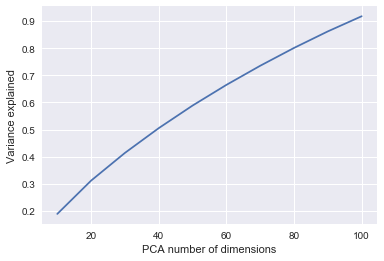

In [11]:
# ------------------------------------------------------------------------------
# YOUR CODE GOES HERE
#

# 1. Compute TF-IDF-weighted word counts and store into `X_tfidf`; do not change
# this variable name since it's used in a later problem subpart!!!

vectorizer = TfidfVectorizer(stop_words="english", min_df=500, max_df=0.8)
X_tfidf = vectorizer.fit_transform(processed_reviews)
X_tfidf = X_tfidf.toarray()

# 2. Plot variance explained vs number of PCA components

pca = PCA(n_components=100)
pca.fit(X_tfidf)  # we only have to fit it once!
explained_variance = []
for num_dim in range(10, 110, 10):
    explained_variance.append(pca.explained_variance_ratio_[:num_dim].sum())
plt.plot(range(10, 110, 10), explained_variance)
plt.xlabel('PCA number of dimensions')
plt.ylabel('Variance explained')

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

Approximately how many PCA components/dimensions are needed to explain 90% of the variance?

**Your answer here (do not write code in your answer):** REPLACE THIS TEXT WITH YOUR ANSWER

**Subpart iii. [10 points]** Use PCA to visualize the data in 2 dimensions.

We have provide some plotting code for you, with a slight twist: the plotting code asks that you identify the PCA low-dimensional representations specific to reviews with a particular rating (e.g., extracting low-dimneionsal representations only for reviews with rating 1, and then only for reviews with rating 2, etc). Please fill in this code. (The reason we have this slight twist compared to what we did in lecture demos is to get a legend to show up that automatically labels which points correspond to which ratings.)

In [12]:
# ------------------------------------------------------------------------------
# YOUR CODE GOES HERE
#

# Fit a PCA model with 2 components
pca = PCA(n_components=2)
pca.fit(X_tfidf)

print(pca.explained_variance_ratio_.sum())  # we don't actually ask for this but we show what this is

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

0.0533151616842209


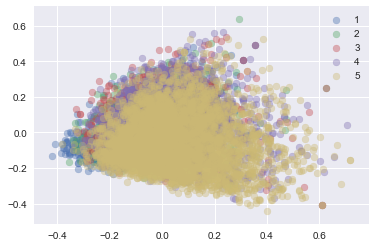

In [13]:
# IN THIS CELL, ONLY WRITE CODE WITHIN THE BLOCK THAT SAYS "YOUR CODE GOES HERE"

fig, ax = plt.subplots()
for rating in range(1, 6):
    # --------------------------------------------------------------------------
    # YOUR CODE GOES HERE
    #
    
    # Find all PCA low-dimensional representations corresponding to `rating`
    # and store their first and second principal component values in the
    # variables below (i.e., the 0-th and 1-st PCA axes if we index from 0)
    subset_low_dim_data = pca.transform(X_tfidf[ratings == rating])
    pca_axis0 = subset_low_dim_data[:, 0]
    pca_axis1 = subset_low_dim_data[:, 1]
    
    # --------------------------------------------------------------------------
    ax.scatter(pca_axis0, pca_axis1,
               c='C%d' % (rating - 1), label=rating,
               cmap='spectral', alpha=0.4)

ax.legend()

Is PCA a good choice for visualizing the TF-IDF-weighted word count vectors for the Yelp review data? Briefly explain why or why not.

**Your answer here (do not write code in your answer):** No. The plot looks like a mess, where points with different ratings heavily overlap. Moreover, if you check the total fraction of variance explained, it's about 5.3%.

**(c)** Building off of part (b), it turns out that t-SNE struggles with the TF-IDF-weighted word counts. We will spare you the pain and agony of trying this yourself, especially as t-SNE is slow to run.

Rather than using TF-IDF-weighting, we have gone ahead and done something for you: we create an alternative 100-dimensional representation for the data using some method we haven't discussed thus far in class. You can load in this representation via running the following cell (the i-th row still corresponds to the i-th review):

In [14]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
X_mystery = np.loadtxt('mystery.csv', delimiter=',')

**Subpart i. [5 points]** Using this new representation of the data instead of the TF-IDF-weighted word counts, what is the total amount of variance explained using 2 PCA components?

In [15]:
# ------------------------------------------------------------------------------
# YOUR CODE GOES HERE
#

# 1. Fit a PCA model with 2 components
pca_mystery = PCA(n_components=2)
pca_mystery.fit(X_mystery)

# 2. Print out the model's total explained variance (the sum)
print(pca_mystery.explained_variance_ratio_.sum())

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

0.9265904481197093


**Subpart ii. [5 points]** Repeat part (b)-iii using the new representation instead, i.e., plot the 2D PCA plot with a legend.

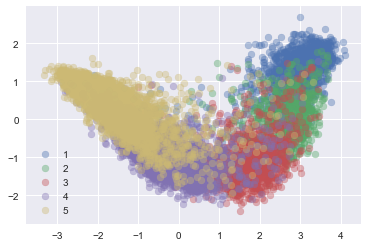

In [16]:
# ------------------------------------------------------------------------------
# YOUR CODE GOES HERE
#

fig, ax = plt.subplots()
for rating in range(1, 6):
    # --------------------------------------------------------------------------
    # YOUR CODE GOES HERE
    #
    
    # find all PCA low-dimensional representations corresponding to `rating`
    # and store their first and second principal component values in the
    # variables below (i.e., the 0-th and 1-st PCA axes if we index from 0)
    subset_low_dim_data = pca_mystery.transform(X_mystery[ratings == rating])
    pca_axis0 = subset_low_dim_data[:, 0]
    pca_axis1 = subset_low_dim_data[:, 1]
    
    #
    # END OF YOUR CODE
    # --------------------------------------------------------------------------
    
    ax.scatter(pca_axis0, pca_axis1,
               c='C%d' % (rating - 1), label=rating,
               cmap='spectral', alpha=0.4)

ax.legend()

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

**Subpart iii. [15 points]** PCA and t-SNE both use Euclidean distance to measure how far apart input points are. Below, we have computed the Euclidean distance tables between every pair of points using TF-IDF-weighted word count vectors as well as the mystery representation we've precomputed for you. In particular, each distance table is a 2D NumPy array where the i-th row, j-th column tells you how close the i-th review is to the j-th review.

Let's first load in these distance tables by running the cell below.

In [17]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
distance_table_tfidf = euclidean_distances(X_tfidf)
distance_table_mystery = euclidean_distances(X_mystery)

In lecture, we talked about how to debug how good a distance or similarity function is by comparing a data point with its closest other data points (using the user-specified distance or similarity function), and seeing if the closest other data points qualitatively make sense.

Fill in the Python function below that, given a distance table `distance_table` and a review index `review_idx`, finds the `k` closest *other* reviews (do not include `review_idx` in these `k` other reviews) and computes the average rating of these `k` closest reviews. Recall that you have the rating for each review (stored in the Python variable `ratings`).

We have already provided code that prints out (if the `verbose` flag is set to `True`) the  input review, the reviews for each of the `k` closest other reviews that your code finds the indices for, the rating for the input review, and the average rating that you compute.

In [18]:
# IN THIS CELL, ONLY WRITE CODE WITHIN THE BLOCK THAT SAYS "YOUR CODE GOES HERE"

def find_closest_reviews(distance_table, review_idx, k=10, verbose=True):
    if verbose:
        print('[Input review that we find the', k, 'closest reviews of]')
        print(processed_reviews[review_idx])
        print()
    
    # --------------------------------------------------------------------------
    # YOUR CODE GOES HERE
    #
    
    # Find the `k` closest points to the review given by `review_idx`, where how
    # close points are is given by `distance_table`
    
    sorted_indices = np.argsort(distance_table[review_idx])
    indices_for_closest_k_reviews = \
        [idx for idx in sorted_indices if idx != review_idx][:k]
    average_rating_of_closest_k_reviews = \
        np.mean([ratings[idx] for idx in indices_for_closest_k_reviews])
    
    #
    # END OF YOUR CODE
    # --------------------------------------------------------------------------
    
    if verbose:
        for idx in range(k):
            print('[%d-closest review]' % (idx + 1))
            print(processed_reviews[indices_for_closest_k_reviews[idx]])
            print()
        print('Input review rating:', ratings[review_idx])
        print('Average rating of', k, 'closest reviews:',
              average_rating_of_closest_k_reviews)
    return ratings[review_idx], average_rating_of_closest_k_reviews

After writing the above function, run the following two cells. If your code is working correctly, these should give a clear example of where the TF-IDF representation yields a particularly bad choice of closest 10 data points to an input review compared to the mystery representation.

In [19]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
find_closest_reviews(distance_table_tfidf, 200)

[Input review that we find the 10 closest reviews of]
well this place was bad even for a bww i am a frequent patron of bwws all over the country i simply love the wings so know have a pretty good idea of what normally to expect this location however just fell flat the service was horribly slow the staff apparently have never worked in a bww before because they had no idea how to speak up and at their guest when it is the typical a roar of noise in these places the waiter who brought us our food was rude reached across the table and people we had empty glasses waiting to order the carrots and celery sticks were server with pools of water i the bottom of the container my wifes burger was cold the list just goes on to top it all off we happen to flag the manager down and had to ask for our waitress and he could have taken that opportunity then to check in with us but didnt

[1-closest review]
words can not express how bland how dirty and ghetto this place is the health department should b

(1, 3.7)

In [20]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
find_closest_reviews(distance_table_mystery, 200)

[Input review that we find the 10 closest reviews of]
well this place was bad even for a bww i am a frequent patron of bwws all over the country i simply love the wings so know have a pretty good idea of what normally to expect this location however just fell flat the service was horribly slow the staff apparently have never worked in a bww before because they had no idea how to speak up and at their guest when it is the typical a roar of noise in these places the waiter who brought us our food was rude reached across the table and people we had empty glasses waiting to order the carrots and celery sticks were server with pools of water i the bottom of the container my wifes burger was cold the list just goes on to top it all off we happen to flag the manager down and had to ask for our waitress and he could have taken that opportunity then to check in with us but didnt

[1-closest review]
first spot we stopped at when we wondered around montreal it looked like a cool place when we cam

(1, 1.6)